# 2.1 Working with real data

Popular open data repositories:
- UC Irvine machine learning repository
- Kaggle datasets 
- Amazon's AWS datasets

# 2.2 Look at the big picture

Example: California census data. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)

## 2.2.1 Frame the problem

**Business objective**: how does the company expect to use and benefit from the model. It will determine how to frame the problem, which algorithms to select, which performance measure to use, and how much effort to spend tweaking it

To predict district pricing

**Pipelines**: 
- A sequence of data processing components
- Components typically run asynchronously. Each component pulls in a large amount of data, processes it, and spits out the result in another data store. Then, some time later, the next component in the pipeline pulls this data and spits out its own output. Each component is fairly self-contained: the interface between components is simply the data store. This makes the system simple to grasp (with the help of a data flow graph), and different teams can focus on different components. Moreover, if a component breaks down, the downstream components can often continue to run normally (at least for a while) by just using the last output from the broken component. This makes the architecture quite robust
- On the other hand, a broken component can go unnoticed for some time if proper monitoring is not implemented. The data gets stale and the overall system’s performance drops

**Current solution**: a reference for performance, as well as insights on how to solve the problem

**Frame problem**: supervised learning, multiple regression, univariate regression, batch learning

## 2.2.2 Select a performance measure

RMSE - Root Mean Square Error

MAE - Mean absolute error

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible

Computing the root of a sum of squares (RMSE) corresponds to the Euclidean norm: this is the notion of distance you are familiar with. It is also called the ℓ2 norm, noted ∥ · ∥ (or just ∥ · ∥).

Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥ . This is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks

More generally, the ℓk norm of a vector v containing n elements is defined as . ℓ gives the number of nonzero elements in the vector, and ℓ gives the maximum absolute value in the vector

The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

## 2.2.3 Check the assumptions

List and verify the assumptions made so far to catch serious issues early on

# 2.3 Get the data

## 2.3.1 Create the workspace

## 2.3.2 Download the data

## 2.3.3 Take a quick look at the data structure

In [1]:
# import os
# import tarfile
# import urllib

# DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
# HOUSING_PATH = os.path.join("datasets",'housing')
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url = HOUSING_URL,
#                        housing_path = HOUSING_PATH):
#     os.makedirs(housing_path, exist_ok = True)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz.extractall(path = housing_path)
#     housing_tgz.close()

In [26]:
import pandas as pd
import os

housing = pd.read_csv(os.getcwd() + '/handson-ml2-master/datasets/housing/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [32]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [36]:
from pandas_profiling import ProfileReport
ProfileReport(df = housing)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d5b22bb0>,
      dtype=object)

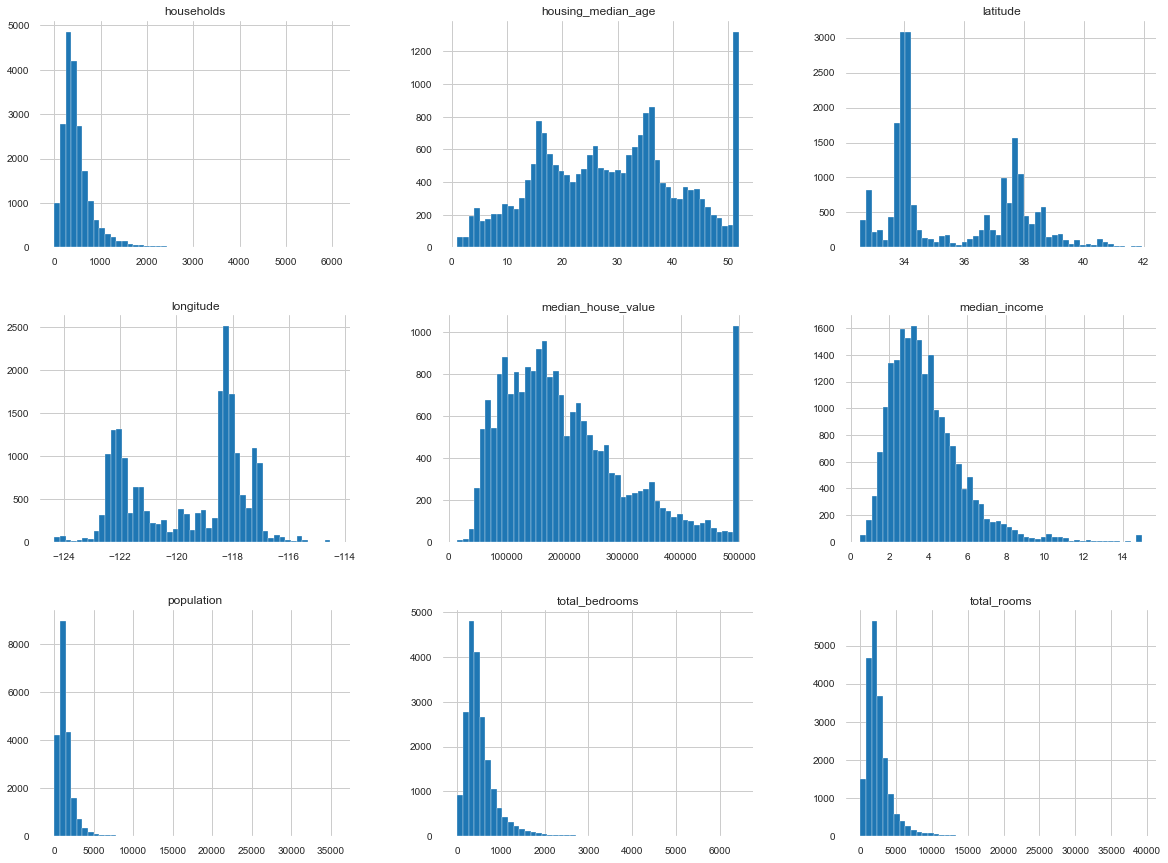

In [37]:
%matplotlib inline 

import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))

## 2.3.4 Create a test set

In [38]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier)

For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test
set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [40]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))& 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
housing_with_id = housing.reset_index() # adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [44]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [45]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [46]:
len(train_set), len(test_set)

(16512, 4128)

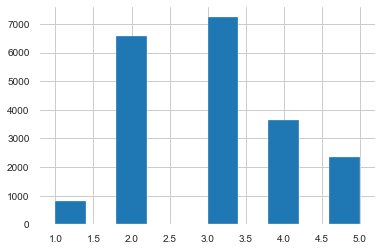

In [48]:
housing['income_cat'] = pd.cut(housing.median_income,
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])
housing.income_cat.hist()

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [52]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [54]:
housing.income_cat.value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income, dtype: float64

In [58]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# 2.4 Discover and visualize the data to gain insights

In [59]:
housing = strat_train_set.copy()

## 2.4.1 Visualizing geographical data

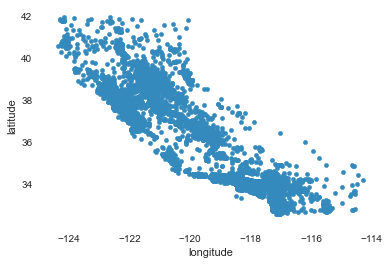

In [61]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

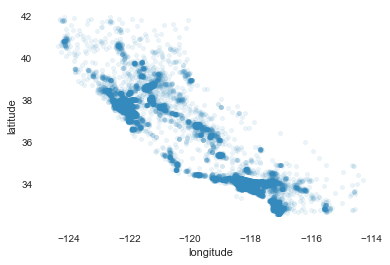

In [62]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

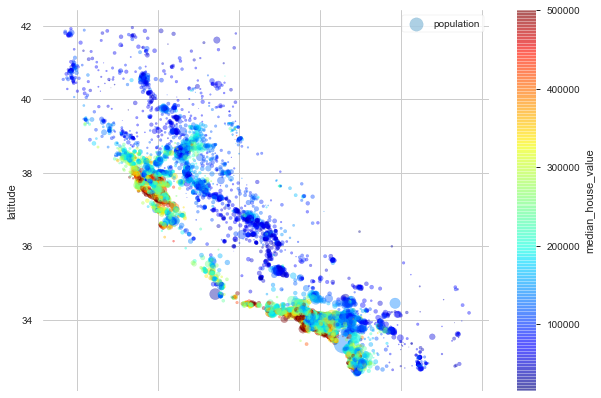

In [65]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population']/100, label = 'population', figsize = (10, 7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True, grid = True)
plt.legend()

## 2.4.2 Looking for correlations

In [66]:
corr_matrix = housing.corr()

In [67]:
corr_matrix.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0cc6c6670>,
      dtype=object)

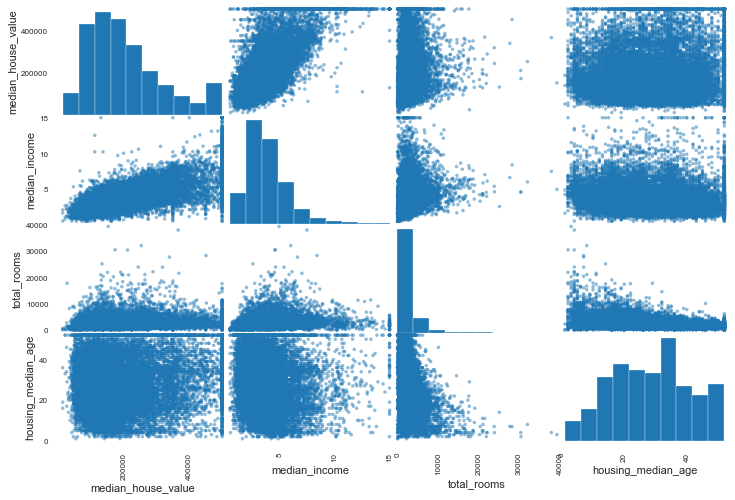

In [73]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))

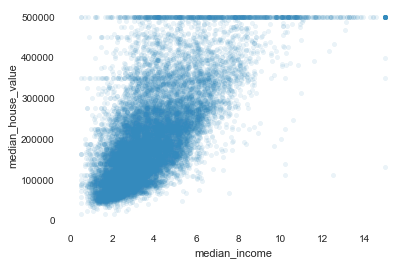

In [74]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

## 2.4.3 Experimenting with attribute combinations

In [75]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [76]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 2.5 Prepare the data for machine learning algorithms

Write functions for data preparation:
- Reproduce transformations easily on any dataset
- Gradually build a library of transformation functions that can be reused in future projects
- Use functions in the live system to transform the new data before feeding it to the algorithms 
- Easily try various transformations and see which combination of transformations works best

In [77]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

## 2.5.1 Data cleaning

In [ ]:
housing.dropna(subset = ['total_bedrooms']) # option 1, get rid of the corresponding districts
housing.drop('total_bedrooms', axis = 1) # option 2, get rid of the whole attribute
median = housing['total_bedrooms'].median() # option 3, set the valyes to some value (zero, the mean, the median, etc)
housing['total_bedrooms'].fillna(median, inplace = True)

In [79]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes

In [80]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [83]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Use the trained imputer to transform the training set by replacing missing values with the learned medians 

In [85]:
X = imputer.transform(housing_num)

In [87]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

**Scikit-learn design**:
1. Consistency: 
- Estimators: Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter)
- Transformers: Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster)
- Predictors: Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms)
2. Inspetion:
- All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_)
3. Nonproliferation of classes:
- Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers
4. Composition:
- Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary equence of transformers followed by a final estimator
5. Sensible defaults:
- Scikit-Learn provides reasonable default values for most arameters, making it easy to quickly create a baseline working ystem

## 2.5.2 Handling text and categorical attributes

In [89]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [91]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [93]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [95]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a SciPy sparse matrix, instead of a NumPy array

In [98]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [99]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [100]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Tip**: If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a arge number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you could replace each category with a learnable, low-dimensional vector called an embedding. Each category’s representation would be learned during training. This is an example of representation learning (see Chapters 13 nd 17 for more details).

## 2.5.3 Custom transformers

In [101]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 2.5.4 Feature scaling

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

1. Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.
2. Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization

As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

## 2.5.5 Transformation pipelines

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                 ('attribs_adder', CombinedAttributesAdder()),
                                 ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they are unique and don’t contain double underscores, __); they will come in handy later for hyperparameter tuning.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit() method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (and of course also a fit_transform() method, which is the one we used).

**ColumnTransformer**: handle categorical and numerical columns all at once. Works greate with pandas DataFrames

In [105]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# 2.6 Select and train a model

## 2.6.1 Training and evaluating on the training set

In [108]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X = housing_prepared, y = housing_labels)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lin_reg.coef_

array([-55650.4116403 , -56716.45236929,  13732.83841856,  -1933.1277138 ,
         7330.04062103, -45708.26306673,  45455.47519691,  74714.39134154,
         6605.12802802,   1042.95709453,   9249.75886697, -18016.52432168,
       -55219.15208555, 110357.78363967, -22479.84008184, -14642.2671506 ])

In [110]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [112]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_true = housing_labels, y_pred = housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X = housing_prepared, y = housing_labels)
tree_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [117]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y_true = housing_labels, y_pred = housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## 2.6.2 Better evaluation using cross-validation

In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = tree_reg, X = housing_prepared, y = housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([68328.61556121, 66856.43519092, 72003.34197549, 68827.35362795,
       71846.92629877, 74598.50350173, 70891.52929073, 70055.19624166,
       77783.45131459, 69669.46856634])

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [120]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
display_scores(tree_rmse_scores)

Scores: [68328.61556121 66856.43519092 72003.34197549 68827.35362795
 71846.92629877 74598.50350173 70891.52929073 70055.19624166
 77783.45131459 69669.46856634]
Mean: 71086.08215693901
Standard deviation: 3038.3361799606105


Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation)

In [121]:
lin_scores = cross_val_score(estimator = lin_reg, X = housing_prepared, y = housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


In [124]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X = housing_prepared, y = housing_labels)
forest_reg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

**Tip**: You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the crossvalidation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip):

In [126]:
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')
my_model_loaded = joblib.load('forest_reg.pkl')

# 2.7 Fine-tune your model

## 2.7.1 Grid search

Fine tune the hyperparameters

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X = housing_prepared, y = housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

In [131]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [132]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

In [133]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63715.09247875852 {'max_features': 2, 'n_estimators': 3}
55031.45756748138 {'max_features': 2, 'n_estimators': 10}
52968.07438375498 {'max_features': 2, 'n_estimators': 30}
60338.03124509865 {'max_features': 4, 'n_estimators': 3}
52479.353376849314 {'max_features': 4, 'n_estimators': 10}
50471.83585546991 {'max_features': 4, 'n_estimators': 30}
59494.77890331913 {'max_features': 6, 'n_estimators': 3}
52340.9580668088 {'max_features': 6, 'n_estimators': 10}
49879.14195271459 {'max_features': 6, 'n_estimators': 30}
59032.72018907592 {'max_features': 8, 'n_estimators': 3}
52133.73028269116 {'max_features': 8, 'n_estimators': 10}
49939.27660429002 {'max_features': 8, 'n_estimators': 30}
63791.58931121562 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54745.2552234535 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60629.05079472652 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52767.13955607013 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

## 2.7.2 Randomized search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
- Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

In [134]:
from sklearn.model_selection import RandomizedSearchCV

## 2.7.3 Ensemble methods

The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors

## 2.7.4 Analyze the best models and their errors

In [135]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.52212957e-02, 6.98427519e-02, 4.28154364e-02, 1.70118973e-02,
       1.70743405e-02, 1.76910774e-02, 1.62540178e-02, 3.04354590e-01,
       5.50759989e-02, 1.03733203e-01, 1.03486582e-01, 6.99560743e-03,
       1.63704057e-01, 1.28990188e-04, 2.90321284e-03, 3.70694093e-03])

In [136]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.30435458976494917, 'median_income'),
 (0.1637040574310512, 'INLAND'),
 (0.1037332032494219, 'pop_per_hhold'),
 (0.10348658232774288, 'bedrooms_per_room'),
 (0.0752212957021518, 'longitude'),
 (0.0698427518745554, 'latitude'),
 (0.05507599894418267, 'rooms_per_hhold'),
 (0.042815436401670556, 'housing_median_age'),
 (0.0176910774004208, 'population'),
 (0.017074340489424956, 'total_bedrooms'),
 (0.017011897262670893, 'total_rooms'),
 (0.016254017759430292, 'households'),
 (0.0069956074345325515, '<1H OCEAN'),
 (0.003706940929619877, 'NEAR OCEAN'),
 (0.0029032128403286756, 'NEAR BAY'),
 (0.000128990187846385, 'ISLAND')]

## 2.7.5 Evaluate your system on the test set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set

In [137]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47670.203941526044

In [138]:
from scipy import stats 

confidence = 0.95 
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45745.66064802, 49520.00827473])

# 2.8 Launch, monitor, and maintain your system

Perfect, you got approval to launch! You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). Then you can deploy your model to your production environment. One way to do this is to save the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its predict() method. For example, perhaps the model will be used within a website: the user will type in some data about a new district and click the Estimate Price button. This will send a query containing the data to the web server, which will forward it to your web application, and finally your code will simply call the model’s predict() method (you want to load the model upon server startup, rather than every time the model is used). Alternatively, you can wrap the model within a dedicated web service that your web application can query through a REST API (see Figure 2-17). This makes it easier to upgrade your model to new versions without interrupting the main application. It also simplifies scaling, since you can start as many web services as needed and load-balance the requests coming from your web application across these web services. Moreover, it allows your web application to use any language, not just Python

Another popular strategy is to deploy your model on the cloud, for example on Google Cloud AI Platform (formerly known as Google Cloud ML Engine): just save your model using joblib and upload it to Google Cloud Storage (GCS), then head over to Google Cloud AI Platform and create a new model version, pointing it to the GCS file. That’s it! This gives you a simple web service that takes care of load balancing and scaling for you. It take JSON requests containing the input data (e.g., of a district) and returns JSON responses containing the predictions. You can then use this web service in your website (or whatever production environment you are using). As we will see in Chapter 19, deploying TensorFlow models on AI Platform is not much different from deploying Scikit-Learn models

But deployment is not the end of the story. You also need to write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops. This could be a steep drop, likely due to a broken component in your infrastructure, but be aware that it could also be a gentle decay that could easily go unnoticed for a long time. This is quite common because models tend to “rot” over time: indeed, the world changes, so if the model was trained with last year’s data, it may not be adapted to today’s data

So you need to monitor your model’s live performance. But how do you that? Well, it depends. In some cases, the model’s performance can be inferred from downstream metrics. For example, if your model is part of a recommender system and it suggests products that the users may be interested in, then it’s easy to monitor the number of recommended products sold each day. If this number drops (compared to non-recommended products), then the prime suspect is the model. This may be because the data pipeline is broken, or perhaps the model needs to be retrained on fresh data

However, it’s not always possible to determine the model’s performance without any human analysis. For example, suppose you trained an image classification model (see Chapter 3) to detect several product defects on a production line. How can you get an alert if the model’s performance drops, before thousands of defective products get shipped to your clients? One solution is to send to human raters a sample of all the pictures that the model classified (especially pictures that the model wasn’t so sure about). Depending on the task, the raters may need to be experts, or they could be nonspecialists, such as workers on a crowdsourcing platform (e.g., Amazon Mechanical Turk). In some applications they could even be the users themselves, responding for example via surveys or repurposed captchas

Either way, you need to put in place a monitoring system (with or without human raters to evaluate the live model), as well as all the relevant processes to define what to do in case of failures and how to prepare for them. Unfortunately, this can be a lot of work. In fact, it is often much more work than building and training a model.

If the data keeps evolving, you will need to update your datasets and retrain your model regularly. You should probably automate the whole process as much as possible. Here are a few things you can automate:
- Collect fresh data regularly and label it (e.g., using human raters).
- Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.
- Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why).

You should also make sure you evaluate the model’s input data quality. Sometimes performance will degrade slightly because of a poor-quality signal (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale), but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your model’s inputs, you may catch this earlier. For example, you could trigger an alert if more and more inputs are missing a feature, or if its mean or standard deviation drifts too far from the training set, or a categorical feature starts containing new categories.

Finally, make sure you keep backups of every model you create and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason. Having backups also makes it possible to easily compare new models with previous ones. Similarly, you should keep backups of every version of your datasets so that you can roll back to a previous dataset if the new one ever gets corrupted (e.g., if the fresh data that gets added to it turns out to be full of outliers). Having backups of your datasets also allows you to evaluate any model against any previous dataset

You may want to create several subsets of the test set in order to evaluate how well your model performs on specific parts of the data. For example, you may want to have a subset containing only the most recent data, or a test set for specific kinds of inputs (e.g., districts located inland versus districts located near the ocean). This will give you a deeper understanding of your model’s strengths and weaknesses.

# 2.9 Try it out

Much of the work is in the data preparation step: building monitoring tools, setting up human evaluation pipelines, and automating regular model training. The Machine Learning algorithms are important, of course, but it is probably preferable to be comfortable with the overall process and know three or four algorithms well rather than to spend all your time exploring advanced algorithms.